# Exploratory Data Analysis

## Dataset Load
Here's the paths to the dataset's zip file and to the directory you want to extract the files:

In [1]:
# change path according to your local path
dset_zip_path = "D:\\_coding\\_wd\\_python\\uni\\Behavioral-Context-Recognition\\dataset\\ExtraSensory.per_uuid_features_labels.zip"
dset_final_path = "D:\\_coding\\_wd\\_python\\uni\\Behavioral-Context-Recognition\\dataset\\unzipped_dataset"

From the main dataset's zip file <code>dset_zip_path</code>, we extract the inner gz files
(where 1 gz file contains measurements relative to 1 subject). The gz file are extracted to the directory <code>dset_final_path</code>.

In [2]:
from zipfile import ZipFile

with ZipFile(dset_zip_path, 'r') as zipObject:
   listOfFileNames = zipObject.namelist()
   for fileName in listOfFileNames:
      zipObject.extract(fileName, dset_final_path)
   print('All the files are extracted')


All the files are extracted


Now we get the measurements' data from all files into 1 single DataFrame. Since data come from several gz files (where each file is related to a single subject), for all measurement time stamp, we add the id of the relative subject (by simply adding the name of the file).

In [3]:
import os
import gzip
import pandas as pd

df_list=[]
for gzFile in os.listdir(dset_final_path):
   path_gz = dset_final_path + "\\" + gzFile
   with gzip.open(path_gz) as f:
      df = pd.read_csv(f, header=0)
      df.insert(0,'uuid',gzFile[:-23])
      df_list.append(df)

df_dset = pd.concat(df_list, axis=0, ignore_index=True)
df_dset.head()

,uuid,timestamp,raw_acc:magnitude_stats:mean,raw_acc:magnitude_stats:std,raw_acc:magnitude_stats:moment3,raw_acc:magnitude_stats:moment4,raw_acc:magnitude_stats:percentile25,raw_acc:magnitude_stats:percentile50,raw_acc:magnitude_stats:percentile75,raw_acc:magnitude_stats:value_entropy,...,label:STAIRS_-_GOING_DOWN,label:ELEVATOR,label:OR_standing,label:AT_SCHOOL,label:PHONE_IN_HAND,label:PHONE_IN_BAG,label:PHONE_ON_TABLE,label:WITH_CO-WORKERS,label:WITH_FRIENDS,label_source
0,00EABED2-271D-49D8-B599-1D4A09240601,1444079161,0.996815,0.003529,-0.002786,0.006496,0.995203,0.996825,0.998502,1.748756,...,NaN,NaN,0.0,NaN,NaN,NaN,1.0,1.0,NaN,2
1,00EABED2-271D-49D8-B599-1D4A09240601,1444079221,0.996864,0.004172,-0.003110,0.007050,0.994957,0.996981,0.998766,1.935573,...,NaN,NaN,0.0,NaN,NaN,NaN,1.0,1.0,NaN,2
2,00EABED2-271D-49D8-B599-1D4A09240601,1444079281,0.996825,0.003667,0.003094,0.006076,0.994797,0.996614,0.998704,2.031780,...,NaN,NaN,0.0,NaN,NaN,NaN,1.0,1.0,NaN,2
3,00EABED2-271D-49D8-B599-1D4A09240601,1444079341,0.996874,0.003541,0.000626,0.006059,0.995050,0.996907,0.998690,1.865318,...,NaN,NaN,0.0,NaN,NaN,NaN,1.0,1.0,NaN,2
4,00EABED2-271D-49D8-B599-1D4A09240601,1444079431,0.997371,0.037653,0.043389,0.102332,0.995548,0.996860,0.998205,0.460806,...,NaN,NaN,0.0,NaN,NaN,NaN,1.0,1.0,NaN,2


Looking at the head of the DataFrame, we see that we have a total
of 279 columns: 278 from the csv files and the first one
(<code>uuid</code>) which we added for linking the single time stamp
to the relative subject id.

Now let's get a description of the <code>uuid</code> column to assess that all the subjects are added to the dataframe.

In [4]:
df_dset['uuid'].describe()

count                                   377346
unique                                      60
top       78A91A4E-4A51-4065-BDA7-94755F0BB3BB
freq                                     11996
Name: uuid, dtype: object

There are a total of 60 <code>unique</code> items in the <code>uuid</code> column so it's safe to say that all subjects' data have been correctly retrieved.

## Variables exploration
The general description of the dataset is accessible at the link http://extrasensory.ucsd.edu/data/primary_data_files/README.txt.

Here we start by taking into consideration a single variable to find out the time series' trends for each variable and the correlation between the single variable and the labels.

### Watch Acceleration

In [9]:
uuid = '1155FF54-63D3-4AB2-9863-8385D0BD0A13'
user_data = df_dset.loc[df_dset['uuid']==uuid]
user_data = user_data.copy()
user_data.reset_index(inplace=True,drop=True)
user_data

,uuid,timestamp,raw_acc:magnitude_stats:mean,raw_acc:magnitude_stats:std,raw_acc:magnitude_stats:moment3,raw_acc:magnitude_stats:moment4,raw_acc:magnitude_stats:percentile25,raw_acc:magnitude_stats:percentile50,raw_acc:magnitude_stats:percentile75,raw_acc:magnitude_stats:value_entropy,...,label:STAIRS_-_GOING_DOWN,label:ELEVATOR,label:OR_standing,label:AT_SCHOOL,label:PHONE_IN_HAND,label:PHONE_IN_BAG,label:PHONE_ON_TABLE,label:WITH_CO-WORKERS,label:WITH_FRIENDS,label_source
0,1155FF54-63D3-4AB2-9863-8385D0BD0A13,1464129912,1.011438,0.012573,0.023013,0.041240,1.006184,1.010868,1.016028,0.935099,...,0.0,NaN,0.0,0.0,NaN,NaN,NaN,1.0,0.0,2
1,1155FF54-63D3-4AB2-9863-8385D0BD0A13,1464129950,1.011233,0.009356,-0.005622,0.016687,1.006338,1.010926,1.016657,1.732968,...,0.0,NaN,0.0,0.0,NaN,NaN,NaN,1.0,0.0,2
2,1155FF54-63D3-4AB2-9863-8385D0BD0A13,1464130031,1.013422,0.018068,-0.008593,0.039286,1.004077,1.012983,1.021926,1.464639,...,0.0,NaN,0.0,0.0,NaN,NaN,NaN,1.0,0.0,2
3,1155FF54-63D3-4AB2-9863-8385D0BD0A13,1464130109,1.014891,0.016400,0.021383,0.038825,1.005934,1.014670,1.023000,1.440043,...,0.0,NaN,0.0,0.0,NaN,NaN,NaN,1.0,0.0,2
4,1155FF54-63D3-4AB2-9863-8385D0BD0A13,1464130130,1.017487,0.022632,-0.012891,0.037226,1.006040,1.017587,1.028168,1.937362,...,0.0,NaN,0.0,0.0,NaN,NaN,NaN,1.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2680,1155FF54-63D3-4AB2-9863-8385D0BD0A13,1464886422,1.002114,0.043888,-0.023421,0.060480,0.975662,1.001421,1.028555,2.562570,...,0.0,NaN,0.0,0.0,0.0,NaN,0.0,0.0,0.0,1
2681,1155FF54-63D3-4AB2-9863-8385D0BD0A13,1464886722,1.015957,0.068057,-0.030021,0.108892,0.980304,1.015067,1.050255,2.055226,...,0.0,NaN,0.0,0.0,0.0,NaN,0.0,0.0,0.0,1
2682,1155FF54-63D3-4AB2-9863-8385D0BD0A13,1464887023,0.996011,0.039554,-0.034651,0.065742,0.976391,0.998637,1.018739,1.989673,...,0.0,NaN,0.0,0.0,0.0,NaN,0.0,0.0,0.0,1
2683,1155FF54-63D3-4AB2-9863-8385D0BD0A13,1464887322,1.079283,0.404817,0.330815,0.569329,0.907679,1.001940,1.298900,2.453154,...,0.0,NaN,0.0,0.0,0.0,NaN,0.0,0.0,0.0,4


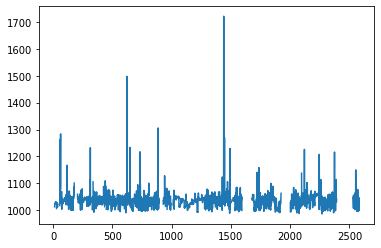

In [10]:
from matplotlib import pyplot

user_data["watch_acceleration:magnitude_stats:mean"].plot()
pyplot.show()